Importing python packages

In [126]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

In [127]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

Importing the master Form A dataset (variables extracted for main GUSTO cohort and IVF cohort)

In [128]:
file = '/home/mukkesh/Manuscript1_final2020/FormA392_20191206.xlsx'
df = pd.read_excel(file, index_col = "SubjectID")

Inspecting the dataset

In [129]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                        float64
bw_percentile_Lancet2011                                    float64
size_at_birth_Lancet2011                                     object
LGA_Lancet2011_bin                                          float64
children_at_home                                             object
working_situation                                            object
childcare_arr_1                                              object
childcare_arr_1_specify                                      object
childcare_arr_1_recoded                                      object
childcare_arr_2                                              object
childcare_arr_2_specify                                      object
childcare_arr_2_recoded                                      object
childcare_arr_3                                              object
childcare_arr_3_specify                                      object
childcare_arr_3_recoded                         

In [130]:
df.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04002                 -0.28                     39.05   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04010                 -0.77                     22.08   
010-04011                 -0.30                     38.33   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04002                      AGA                 0.0              NaN   
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04010                      AGA                 0.0              NaN   
010-04011                      AGA                 0.0              NaN   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04002               NaN             NaN                     NaN   
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04010               NaN             NaN                     NaN   
010-04011               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04002                     NaN                         8.0   
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04010                     NaN                         9.0   
010-04011                     NaN                         7.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04002                  0_no                           0.0            NaN   
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04010                 1_yes                           1.0          1_yes   
010-04011                 1_yes                           1.0           0_no   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04002     no_contraception                           NaN   
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04010                  NaN                           NaN   
010-04011                  NaN                           NaN   

          con

Removing subjects who self-reported Type 2 Diabetes (T2D) at pregnancy week 11

In [131]:
df.drop(['010-20008', '010-20191', '010-20224'], inplace=True)

Removing Subject ID 010-21272 (mother is of other ethnicity, Mother is Indian Muslim (IC says Indian race and Malay dialect) and genetic PCA positions her in between Malay and Indian cluster

In [132]:
df.drop(['010-21272'], inplace=True)

In [133]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                 1174
bw_percentile_Lancet2011                             1174
size_at_birth_Lancet2011                             1174
LGA_Lancet2011_bin                                   1174
children_at_home                                     1340
working_situation                                     705
childcare_arr_1                                       435
childcare_arr_1_specify                                32
childcare_arr_1_recoded                               435
childcare_arr_2                                       435
childcare_arr_2_specify                                41
childcare_arr_2_recoded                               435
childcare_arr_3                                       435
childcare_arr_3_specify                                14
childcare_arr_3_recoded                               435
number_weeks_been_pregnant                           1192
was_pregnancy_planned                                1204
was_pregnancy_

GDM status in GUSTO original dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [134]:
df['m_gdm_who_1999'].value_counts(dropna=False)

No     939
NaN    298
Yes    223
Name: m_gdm_who_1999, dtype: int64

Calculating the prevalence of GDM (%) in original dataset

In [135]:
(223/(939+223))*100

19.19104991394148

Plotting the distribution of gestational age when antenatal OGTT was performed

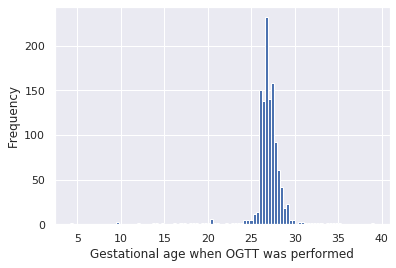

In [136]:
plt.hist(df['m_ogtt_gestationalweek'], 100)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga', dpi=100)
plt.show()

In [137]:
df['m_ogtt_gestationalweek'].describe()

count    1162.000000
mean       26.833029
std         2.129868
min         4.140000
25%        26.430000
50%        26.860000
75%        27.570000
max        39.140000
Name: m_ogtt_gestationalweek, dtype: float64

In [138]:
df_24wks = df[df['m_ogtt_gestationalweek'] < 24]
print(df_24wks.shape)

(36, 1557)


In [139]:
df_29wksogtt = df[df['m_ogtt_gestationalweek'] >= 29]
print(df_29wksogtt.shape)

(54, 1557)


Removing subjects who are less than 24 weeks or more than 29 weeks of gestational age when OGTT was performed

In [140]:
df = df.drop(df[(df.m_ogtt_gestationalweek < 24)].index)
df = df.drop(df[(df.m_ogtt_gestationalweek >= 29)].index)

In [141]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 16.3+ MB


bw_zscore_Lancet2011                                 1088
bw_percentile_Lancet2011                             1088
size_at_birth_Lancet2011                             1088
LGA_Lancet2011_bin                                   1088
children_at_home                                     1258
working_situation                                     658
childcare_arr_1                                       406
childcare_arr_1_specify                                31
childcare_arr_1_recoded                               406
childcare_arr_2                                       406
childcare_arr_2_specify                                38
childcare_arr_2_recoded                               406
childcare_arr_3                                       406
childcare_arr_3_specify                                13
childcare_arr_3_recoded                               406
number_weeks_been_pregnant                           1107
was_pregnancy_planned                                1116
was_pregnancy_

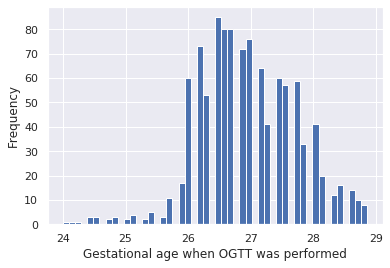

In [142]:
plt.hist(df['m_ogtt_gestationalweek'], 50)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga_2428', dpi=100)
plt.show()

In [143]:
df['m_ogtt_gestationalweek'].describe()

count    1072.000000
mean       26.938293
std         0.784757
min        24.000000
25%        26.430000
50%        26.860000
75%        27.570000
max        28.860000
Name: m_ogtt_gestationalweek, dtype: float64

In [144]:
df.rename(columns=
          {'PAI-1': 'PAI1', 'MCP-1': 'MCP1', 'IGF-I': 'IGFI', 'IGF-II': 'IGFII', 'IGFBP-1': 'IGFBP1', 'IGFBP-3': 'IGFBP3', 'IGFBP-7': 'IGFBP7', 'C-Peptide': 'CPeptide', 'IGFBP-4': 'IGFBP4'}, inplace=True)

Importing scikit-learn machine learning packages and modules

In [145]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from statistics import mean, stdev
from sklearn.externals import joblib

Multiethnic model (Chinese, Malay, Indian)

In [146]:
df1 = df[['ppBMI_WHO_obesity_bin', 'family_history_DM_binary_pw11', 'pw11_any_gdm_outcome_cat', 'pw11_history_macrosomia_cat', 'm_ethnicity_indian_bin', 'm_ethnicity_malay_bin', 'm_ethnicity_chinese_bin', 'mother_age_recruitment', 'm_height_pw26', 'parity_2cat', 'map_est_first_antenatal', 'm_HEI_dairy_pw26', 'm_HEI_total_protein_foods_pw26', 'm_HEI_total_fats_pw26', 'm_HEI_total_grains&_tubers_pw26', 'alcohol_consumption_preg', 'self_reported_smoking_2cat_pw26', 'IGFI', 'Adiponectin', 'm_gdm_who_1999_cat']]


In [147]:
df1.head()

,ppBMI_WHO_obesity_bin,family_history_DM_binary_pw11,pw11_any_gdm_outcome_cat,pw11_history_macrosomia_cat,m_ethnicity_indian_bin,m_ethnicity_malay_bin,m_ethnicity_chinese_bin,mother_age_recruitment,m_height_pw26,parity_2cat,map_est_first_antenatal,m_HEI_dairy_pw26,m_HEI_total_protein_foods_pw26,m_HEI_total_fats_pw26,m_HEI_total_grains&_tubers_pw26,alcohol_consumption_preg,self_reported_smoking_2cat_pw26,IGFI,Adiponectin,m_gdm_who_1999_cat
SubjectID,,,,,,,,,,,,,,,,,,,,
010-04002,NaN,NaN,NaN,NaN,0.0,0.0,1.0,27.60,169.00,1.0,79.7,0.0,8.2,8.8,7.80,0.0,0.0,37983.100729,1.532418e+07,0.0
010-04004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,29.43,147.90,1.0,97.3,5.6,10.0,3.5,4.15,0.0,0.0,36540.114010,6.372214e+06,0.0
010-04006,NaN,0.0,0.0,0.0,1.0,0.0,0.0,27.53,163.45,1.0,101.3,10.0,0.0,10.0,10.00,0.0,0.0,46781.598433,1.922899e+06,0.0
010-04010,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.12,166.45,0.0,NaN,10.0,10.0,6.8,10.00,0.0,0.0,132248.279352,2.621527e+07,0.0
010-04011,NaN,NaN,NaN,NaN,0.0,0.0,1.0,33.89,160.45,1.0,79.7,10.0,8.0,10.0,9.04,0.0,0.0,44042.158523,4.062789e+07,0.0


In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 010-04002 to 029-75019
Data columns (total 20 columns):
ppBMI_WHO_obesity_bin              1028 non-null float64
family_history_DM_binary_pw11      1316 non-null float64
pw11_any_gdm_outcome_cat           1319 non-null float64
pw11_history_macrosomia_cat        1319 non-null float64
m_ethnicity_indian_bin             1348 non-null float64
m_ethnicity_malay_bin              1348 non-null float64
m_ethnicity_chinese_bin            1348 non-null float64
mother_age_recruitment             1348 non-null float64
m_height_pw26                      1106 non-null float64
parity_2cat                        1090 non-null float64
map_est_first_antenatal            1064 non-null float64
m_HEI_dairy_pw26                   1043 non-null float64
m_HEI_total_protein_foods_pw26     1043 non-null float64
m_HEI_total_fats_pw26              1043 non-null float64
m_HEI_total_grains&_tubers_pw26    1043 non-null float64
alcohol_consumption_preg      

Drop rows of pandas dataframe whose value is NaN 

In [149]:
df2=df1.dropna(subset=['ppBMI_WHO_obesity_bin', 'family_history_DM_binary_pw11', 'pw11_any_gdm_outcome_cat', 'pw11_history_macrosomia_cat', 'm_ethnicity_indian_bin', 'm_ethnicity_malay_bin', 'm_ethnicity_chinese_bin', 'mother_age_recruitment', 'm_height_pw26', 'parity_2cat', 'map_est_first_antenatal', 'm_HEI_dairy_pw26', 'm_HEI_total_protein_foods_pw26', 'm_HEI_total_fats_pw26', 'm_HEI_total_grains&_tubers_pw26', 'alcohol_consumption_preg', 'self_reported_smoking_2cat_pw26', 'IGFI', 'Adiponectin', 'm_gdm_who_1999_cat'])


In [150]:
df2.head()

,ppBMI_WHO_obesity_bin,family_history_DM_binary_pw11,pw11_any_gdm_outcome_cat,pw11_history_macrosomia_cat,m_ethnicity_indian_bin,m_ethnicity_malay_bin,m_ethnicity_chinese_bin,mother_age_recruitment,m_height_pw26,parity_2cat,map_est_first_antenatal,m_HEI_dairy_pw26,m_HEI_total_protein_foods_pw26,m_HEI_total_fats_pw26,m_HEI_total_grains&_tubers_pw26,alcohol_consumption_preg,self_reported_smoking_2cat_pw26,IGFI,Adiponectin,m_gdm_who_1999_cat
SubjectID,,,,,,,,,,,,,,,,,,,,
010-04004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,29.43,147.90,1.0,97.3,5.6,10.0,3.5,4.15,0.0,0.0,36540.114010,6.372214e+06,0.0
010-04020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.72,152.70,1.0,70.0,0.0,10.0,0.0,10.00,0.0,0.0,88893.524934,1.615361e+07,0.0
010-04022,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.97,156.10,1.0,92.0,10.0,2.4,10.0,10.00,0.0,0.0,44042.158523,1.287341e+07,1.0
010-04026,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.61,157.65,0.0,78.7,10.0,4.3,10.0,10.00,0.0,0.0,119727.693025,2.149117e+07,1.0
010-04035,0.0,1.0,0.0,0.0,0.0,1.0,0.0,21.83,159.90,0.0,81.0,10.0,10.0,1.5,8.96,0.0,0.0,44153.417535,3.010386e+07,0.0


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 010-04004 to 020-75021
Data columns (total 20 columns):
ppBMI_WHO_obesity_bin              838 non-null float64
family_history_DM_binary_pw11      838 non-null float64
pw11_any_gdm_outcome_cat           838 non-null float64
pw11_history_macrosomia_cat        838 non-null float64
m_ethnicity_indian_bin             838 non-null float64
m_ethnicity_malay_bin              838 non-null float64
m_ethnicity_chinese_bin            838 non-null float64
mother_age_recruitment             838 non-null float64
m_height_pw26                      838 non-null float64
parity_2cat                        838 non-null float64
map_est_first_antenatal            838 non-null float64
m_HEI_dairy_pw26                   838 non-null float64
m_HEI_total_protein_foods_pw26     838 non-null float64
m_HEI_total_fats_pw26              838 non-null float64
m_HEI_total_grains&_tubers_pw26    838 non-null float64
alcohol_consumption_preg           838 non-nul

GDM status in GUSTO complete dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [152]:
df2['m_gdm_who_1999_cat'].value_counts(dropna=False)

0.0    690
1.0    148
Name: m_gdm_who_1999_cat, dtype: int64

Calculating the prevalence of GDM (%) in complete dataset

In [153]:
(148/(690+148))*100

17.66109785202864

Generating a heatmap of variables

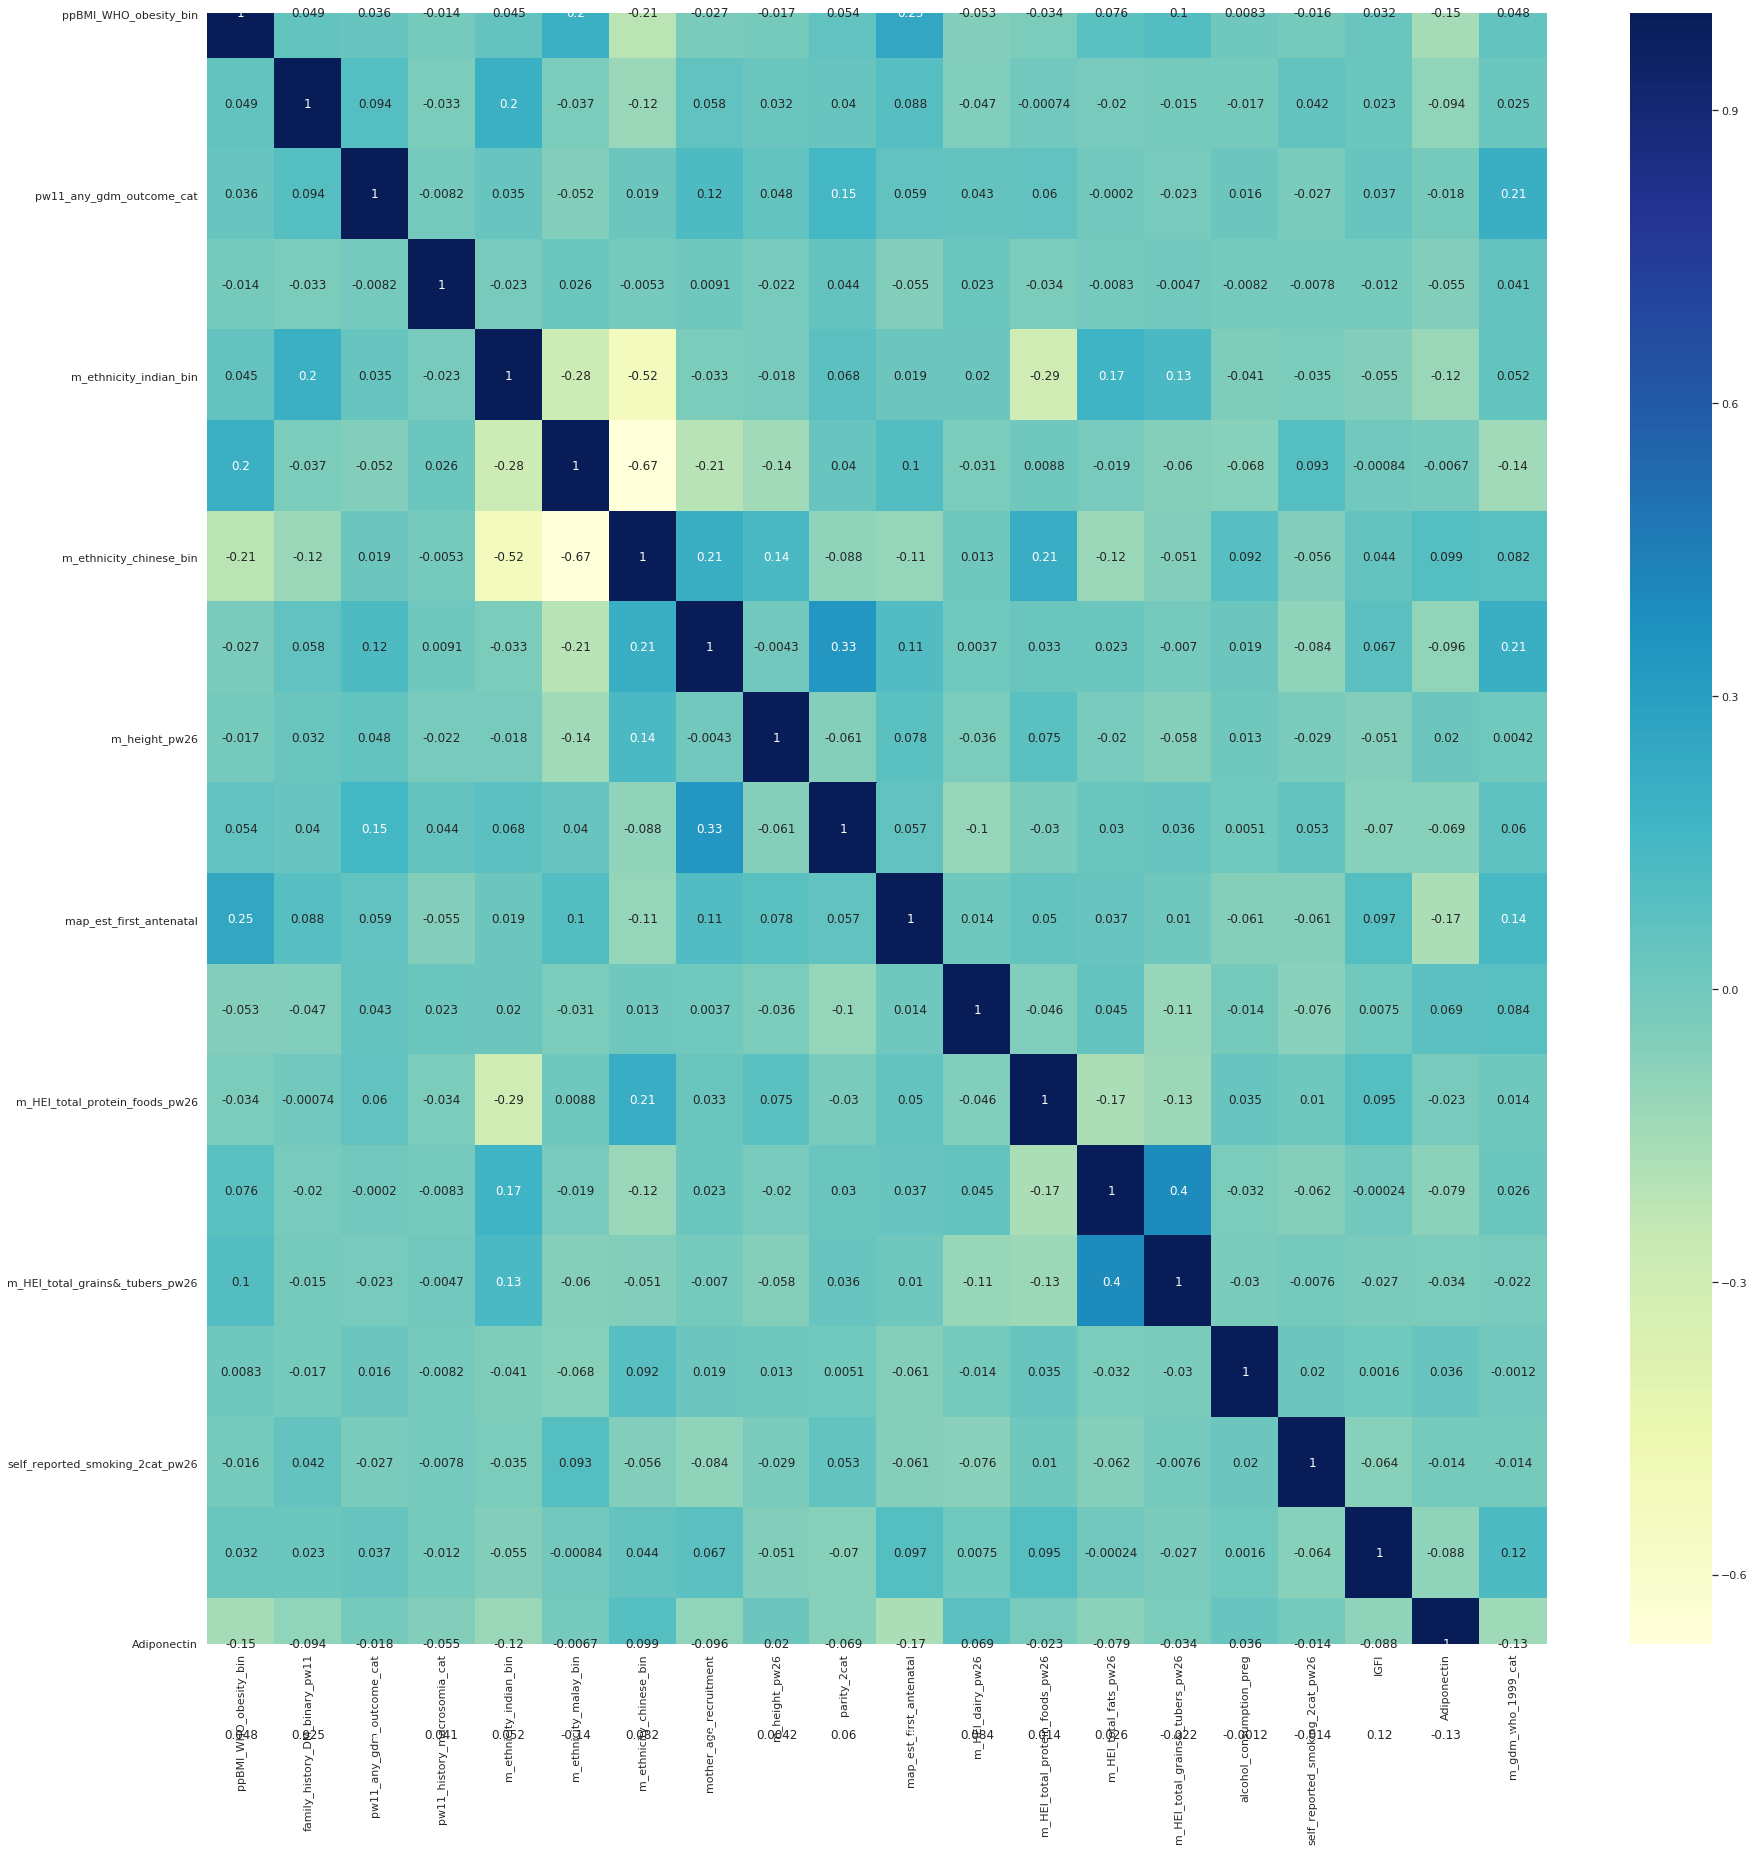

In [154]:
ax = sns.heatmap(df2.corr(method='spearman'), annot=True, cmap="YlGnBu")
fig = plt.gcf()
fig.set_size_inches(30, 30)
fig.savefig('heatmap_spearmancorr_fs', bbox_inches='tight', dpi=300)

Generating X & Y matrices

In [155]:
X=df2.loc[:, df2.columns != 'm_gdm_who_1999_cat']
y=df2.loc[:, df2.columns == 'm_gdm_who_1999_cat']

In [156]:
X.columns

Index(['ppBMI_WHO_obesity_bin', 'family_history_DM_binary_pw11',
       'pw11_any_gdm_outcome_cat', 'pw11_history_macrosomia_cat',
       'm_ethnicity_indian_bin', 'm_ethnicity_malay_bin',
       'm_ethnicity_chinese_bin', 'mother_age_recruitment', 'm_height_pw26',
       'parity_2cat', 'map_est_first_antenatal', 'm_HEI_dairy_pw26',
       'm_HEI_total_protein_foods_pw26', 'm_HEI_total_fats_pw26',
       'm_HEI_total_grains&_tubers_pw26', 'alcohol_consumption_preg',
       'self_reported_smoking_2cat_pw26', 'IGFI', 'Adiponectin'],
      dtype='object')

Create the Catboost classifier object

In [157]:
import catboost as cb
clf = cb.CatBoostClassifier()

Create the grid search parameter grid

In [158]:
clf_param_grid = {
          'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
          'l2_leaf_reg':[1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
          'random_strength':[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
}

In [159]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.10, random_state=0)
grid_fs_auc_cb = GridSearchCV(estimator=clf, param_grid=clf_param_grid, scoring='roc_auc', cv=sss, verbose=1, n_jobs=-1)

Fit the estimator

In [160]:
grid_fs_auc_cb.fit(MaxAbsScaler().fit_transform(X), y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 45.4min
/home/mukkesh/miniconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed: 75.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 108.4min finished


0:	learn: 0.6930859	total: 145ms	remaining: 2m 25s
1:	learn: 0.6930253	total: 197ms	remaining: 1m 38s
2:	learn: 0.6929700	total: 241ms	remaining: 1m 19s
3:	learn: 0.6929143	total: 363ms	remaining: 1m 30s
4:	learn: 0.6928513	total: 410ms	remaining: 1m 21s
5:	learn: 0.6927950	total: 494ms	remaining: 1m 21s
6:	learn: 0.6927369	total: 545ms	remaining: 1m 17s
7:	learn: 0.6926715	total: 616ms	remaining: 1m 16s
8:	learn: 0.6926076	total: 671ms	remaining: 1m 13s
9:	learn: 0.6925466	total: 731ms	remaining: 1m 12s
10:	learn: 0.6924818	total: 774ms	remaining: 1m 9s
11:	learn: 0.6924251	total: 863ms	remaining: 1m 11s
12:	learn: 0.6923578	total: 914ms	remaining: 1m 9s
13:	learn: 0.6922967	total: 991ms	remaining: 1m 9s
14:	learn: 0.6922365	total: 1.04s	remaining: 1m 8s
15:	learn: 0.6921734	total: 1.13s	remaining: 1m 9s
16:	learn: 0.6921110	total: 1.21s	remaining: 1m 9s
17:	learn: 0.6920453	total: 1.26s	remaining: 1m 8s
18:	learn: 0.6919885	total: 1.29s	remaining: 1m 6s
19:	learn: 0.6919263	total: 1.

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x7f3918596da0>,
             iid='warn', n_jobs=-1,
             param_grid={'l2_leaf_reg': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.03,
                                           0.05, 0.1, 0.2, 0.3],
                         'random_strength': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

Compute metrics

In [161]:
AUC = grid_fs_auc_cb.best_score_

In [162]:
AUC

0.7103381642512078

In [163]:
print(grid_fs_auc_cb.best_params_)
print(grid_fs_auc_cb.best_estimator_)

{'l2_leaf_reg': 5.0, 'learning_rate': 0.0001, 'random_strength': 1.0}


In [164]:
std = grid_fs_auc_cb.cv_results_['std_test_score'][grid_fs_auc_cb.best_index_]

In [165]:
std

0.0678846932894358

In [166]:
print("AUC: %0.3f (+/- %0.3f)" % (AUC, std * 1.96))

AUC: 0.710 (+/- 0.133)


Feature importance in Catboost - create a pandas series of feature importance

In [167]:
grid_fs_auc_cb.best_estimator_.feature_importances_

array([ 0.59253784,  0.43742786,  7.86930948,  0.13827251,  1.09922405,
        3.46724104,  1.2141654 , 25.04053011,  4.98062813,  0.5753907 ,
       12.16898594,  7.58335868,  4.11894957,  4.89076134,  4.95547144,
        0.86761387,  1.07944993,  8.328525  , 10.59215711])

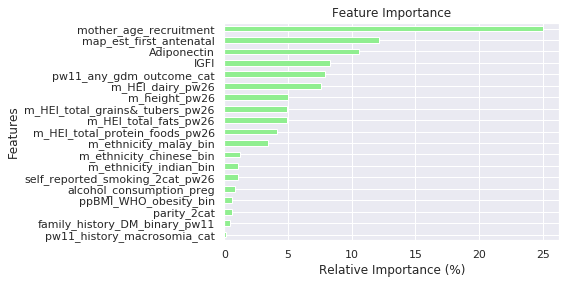

In [168]:
importances_cb_cl = pd.Series(grid_fs_auc_cb.best_estimator_.feature_importances_, index = X.columns)
sorted_importances_cb_cl = importances_cb_cl.sort_values()  
sorted_importances_cb_cl.plot(kind='barh', color='lightgreen')
plt.xlabel('Relative Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('catboost_fs_auc', bbox_inches='tight', dpi=300)
plt.show()

Shap values to interpret the CatBoost models 

In [169]:
import shap

Explain the model's predictions on the entire dataset

In [170]:
shap_values = shap.TreeExplainer(grid_fs_auc_cb.best_estimator_).shap_values(X)

SHAP Summary Plot - The SHAP values for CatBoost explain the margin output of the model, which is the change in log odds of being diagnosed with GDM (general overview of each feature)

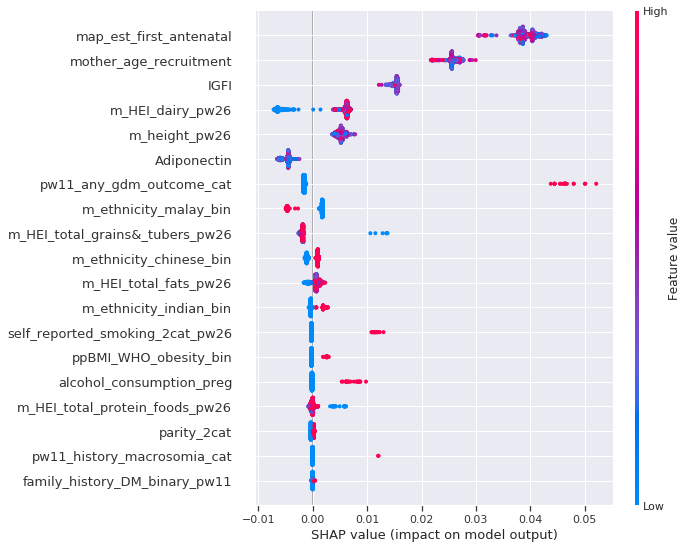

<Figure size 1440x1440 with 0 Axes>

In [171]:
shap.summary_plot(shap_values, X)
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('grid_fs_auc_cb_shap', bbox_inches='tight', dpi=300)

Save the best model as a 'Pickle' - saving the pickled model as a file

In [172]:
# Output a pickle file for the model
joblib.dump(grid_fs_auc_cb.best_estimator_, 'fs_auc_cb.pkl')

['fs_auc_cb.pkl']

Load the pickled model to make predictions on unseen data (in future)

In [173]:
fs_auc_cb = joblib.load('fs_auc_cb.pkl')